In [47]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as dt
import yfinance as yf

In [48]:
start_date = '2012-01-01'
end_date = '2020-01-01'
df = yf.download('AAPL', start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500192,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567369,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706892,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839731,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400


In [49]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517097,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896339,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869423,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290039,144114400
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810921,100805600


In [50]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500192,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567369,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706892,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839731,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400


In [51]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


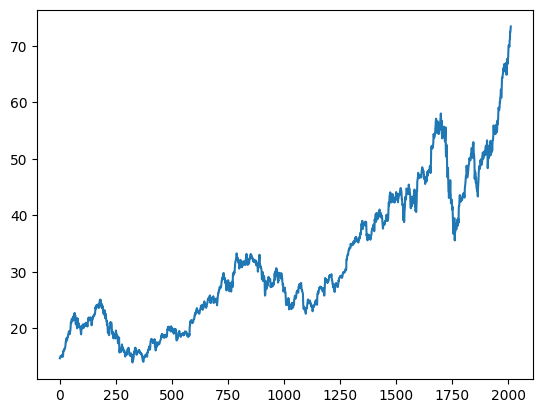

In [52]:
plt.plot(df.Close)


In [65]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2007    59.401700
2008    59.643125
2009    59.875125
2010    60.106325
2011    60.331875
Name: Close, Length: 2012, dtype: float64

In [54]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2007    54.261513
2008    54.396763
2009    54.529350
2010    54.661100
2011    54.793137
Name: Close, Length: 2012, dtype: float64

In [66]:
ma20=df.Close.rolling(20).mean()
ma50=df.Close.rolling(50).mean()


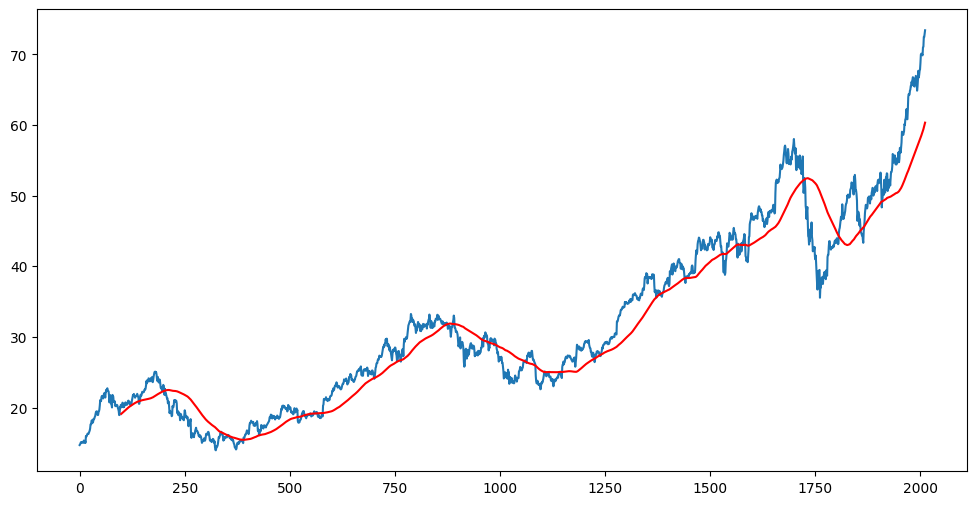

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

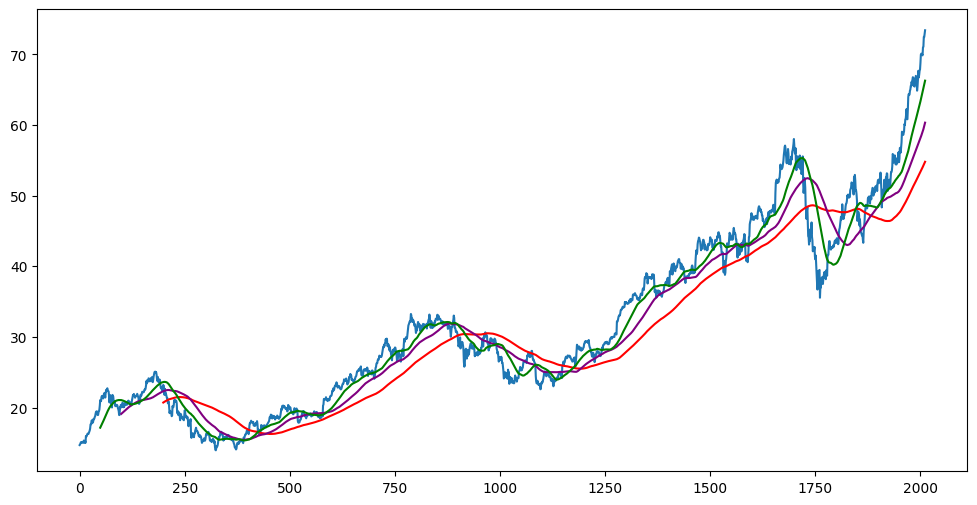

In [70]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'red')
plt.plot(ma100,'purple')
plt.plot(ma50,'green')


In [42]:
df.shape

(2012, 5)

In [74]:
#Splitting Data into training and testing
data_training = pd.DataFrame (df[ 'Close'][0: int(len(df)*0.70)]) 
data_testing = pd.DataFrame(df['Close'][ int(len (df)*0.70): int(len (df))])
print(data_training.shape)
print(data_testing.shape)

(1408, 1)
(604, 1)


In [78]:
data_testing.head()


,Close
1408,40.020000
1409,40.264999
1410,38.830002
1411,39.369999
1412,39.962502


In [80]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [82]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))

In [84]:
data_training_array = scalar.fit_transform(data_training)
data_training_array

array([[0.02870454],
       [0.03176911],
       [0.03813405],
       ...,
       [0.96854989],
       [0.97650943],
       [1.        ]])

In [88]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


In [90]:
x_train,y_train=np.array(x_train),np.array(y_train)

# ML Model 

In [93]:
from keras.layers import Dense , Dropout ,LSTM
from keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'